<a href="https://colab.research.google.com/github/anncipher/Data_Science_Nigeria_Projects/blob/main/DSN_PANDAS_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Loading dataset

df = pd.read_csv('Downloads/titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [ ]:
# Checking the dataset to know data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:
# Checking for missing values

df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [ ]:
# Checking percentage of missing values to readily detect the columns to drop or replace
# Note: Column with large % missing values will be dropped/replaced

df.isnull().sum() * 100 / len(df)

passenger_id     0.000000
pclass           0.000000
name             0.000000
sex              0.000000
age             20.470588
sibsp            0.000000
parch            0.000000
ticket           0.000000
fare             0.117647
cabin           77.529412
embarked         0.117647
boat            63.764706
body            91.411765
home.dest       45.411765
survived         0.000000
dtype: float64

In [ ]:
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [ ]:
# Replacing missing values with mean

df['age'].fillna(value=29.5198, inplace=True)
df['fare'].fillna(value=34.0127, inplace=True)
df['body'].fillna(value=165.8219, inplace=True)


In [ ]:
# Confirm if missing values have been replaced

df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           659
embarked          1
boat            542
body              0
home.dest       386
survived          0
dtype: int64

In [ ]:
# To replace NaN values with the mode

columns_to_fill = ['cabin', 'embarked', 'boat', 'home.dest']
for column in columns_to_fill:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [ ]:
df.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat            0
body            0
home.dest       0
survived        0
dtype: int64

### Data Visualization

<Axes: title={'center': 'Count of Males and Females'}, xlabel='sex', ylabel='count'>

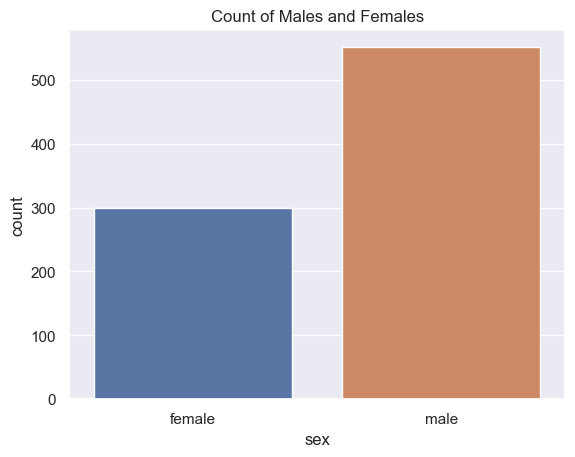

In [ ]:
# Plot the count of Male and Female passengers
# Count of males and females

import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Males and Females')
sns.set(style = 'darkgrid')
sns.countplot(x = df['sex'])